# NLP - Natural Language Processing

In [1]:
import wget

wget.download("http://bigbang.prz.edu.pl/nmum/word2vec/names.txt")

'names.txt'

In [7]:
names = open('names.txt', 'r').read().splitlines()
print(names[:10])
print(len(names))
print(min(len(name) for name in names)) #shortest name
print(max(len(name) for name in names)) #longesst name

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn']
32033
2
15


## BIGRAM - words frequency table

In [9]:
#Creation of a dictionary to store BIGRAMS
BGs = {}
for name in names:
  #To every name in the dictionary we add a beginning/end sign 2hich we select as a dot '.'
  string = ['.'] + list(name) + ['.']

  #Creating bigrams
  for ch1, ch2 in zip(string, string[1:]):
    bigram = (ch1, ch2)
    BGs[bigram] = BGs.get(bigram, 0) + 1

In [10]:
#Dictionary b sorted by frequency of occurrence of bigrams
sorted(BGs.items(), key = lambda kv: -kv[1])

[(('n', '.'), 6763),
 (('a', '.'), 6640),
 (('a', 'n'), 5438),
 (('.', 'a'), 4410),
 (('e', '.'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('.', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('.', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '.'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('.', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '.'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('.', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '.'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('.', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('.', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('.', 'l'), 1572),
 (('.', 'c'), 1542),
 (('.', 'e'), 1531),
 (('j', 'a'), 1473),
 (('r', '.'), 1377),
 (('n', 'e'),

In [11]:
#What characters (letters) appear in the name file, i.e. tokens#
chars = sorted(list(set(''.join(names))))
print(chars)
print(len(chars))

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
26


### Preparation of two dictionaries storing pairs (token number, token), which will be used for conversion

In [12]:
#stoi - string_to_index
stoi = {s:i+1 for i,s in enumerate(chars)}

#At position 0 we add a token representing the beginning and end of the word (name)
stoi['.'] = 0

#itos - index_to_string
itos = {i:s for s,i in stoi.items()}

In [14]:
!pip install torch

   ---------------------------------------- 159.8/159.8 MB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 228.5/228.5 MB 1.8 MB/s eta 0:00:00
   ---------------------------------------- 3.5/3.5 MB 4.2 MB/s eta 0:00:00
   ---------------------------------------- 177.6/177.6 kB 5.4 MB/s eta 0:00:00
   ---------------------------------------- 5.7/5.7 MB 4.4 MB/s eta 0:00:00
   ---------------------------------------- 536.2/536.2 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: intel-openmp
    Found existing installation: intel-openmp 2024.0.0
    Uninstalling intel-openmp-2024.0.0:
      Successfully uninstalled intel-openmp-2024.0.0
  Attempting uninstall: mkl
    Found existing installation: mkl 2024.0.0
    Uninstalling mkl-2024.0.0:
      Successfully uninstalled mkl-2024.0.0


In [15]:
#We will use the pytorch library to learn ANN
import torch

N = torch.zeros((27, 27), dtype=torch.int32)

In [16]:
for w in names:
  #chs - to skrót od char (znak)
  chs = ['.'] + list(w) + ['.']
  #sprawdzamy kazda pare znakow
  for ch1, ch2 in zip(chs, chs[1:]):
    #i w tablicy N zapamietujemy, ze dane znaki tworzyly pare
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

### Visualisation of the N array

(-0.5, 26.5, 26.5, -0.5)

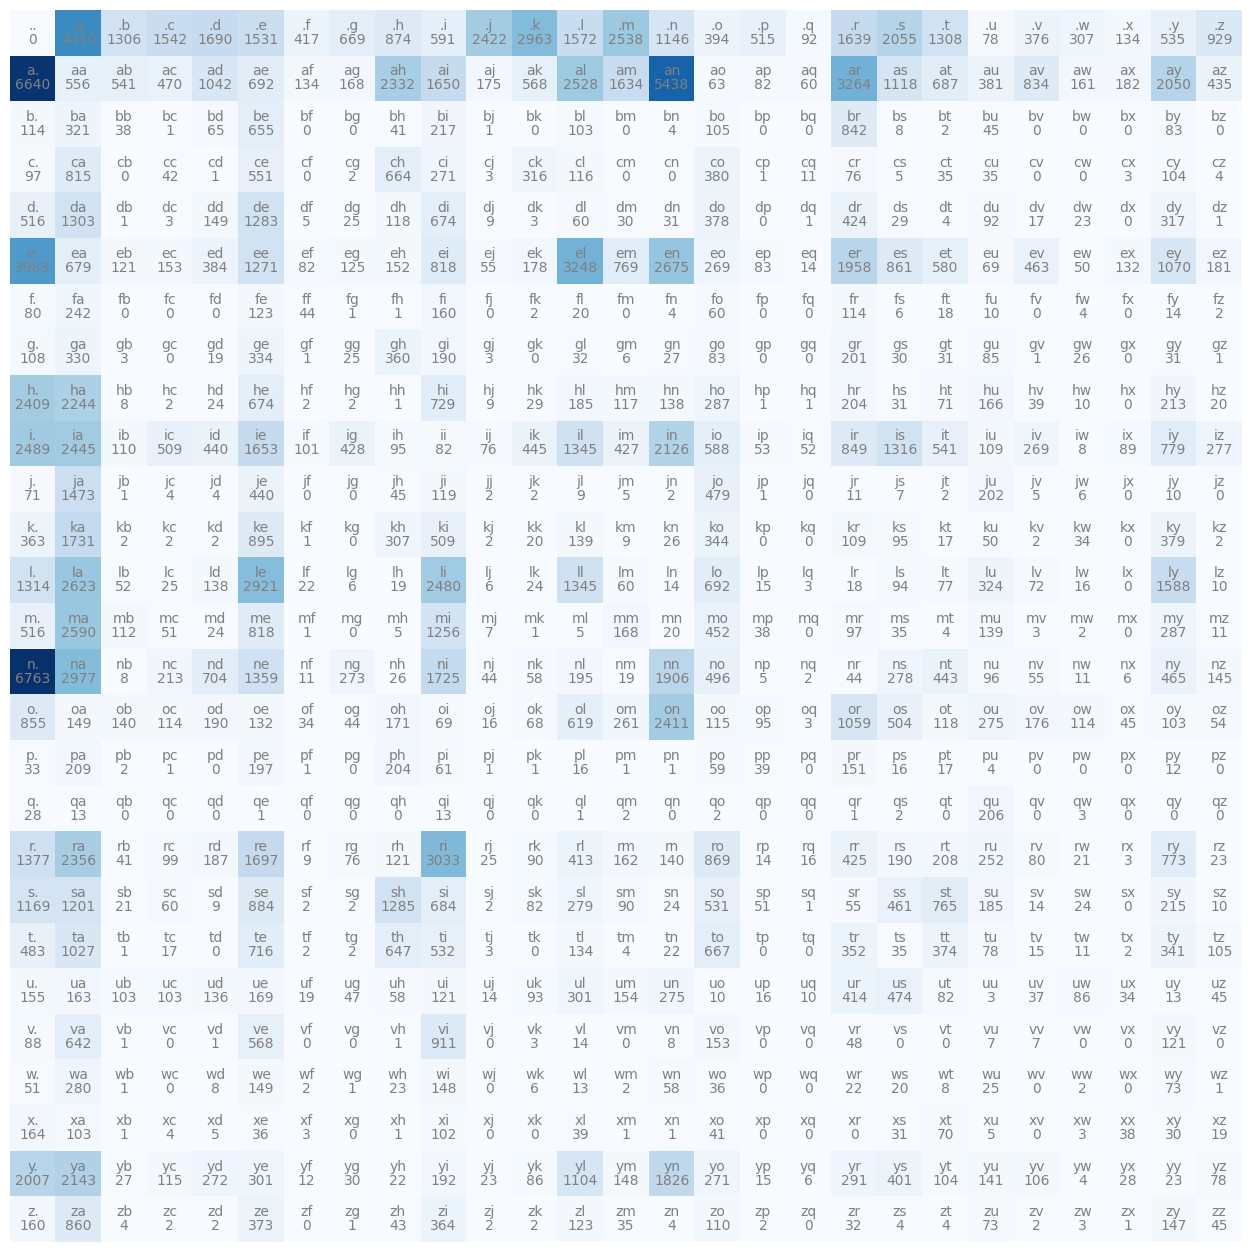

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off')

### Generating new names

In [19]:
#Change frequency of bigrams into probability
P = N[0,:].float()
P = P / P.sum()

In [23]:
seed = 1234

#Using the pytorch library, we will generate the index of the next token using the information about the probability of occurrence, which is stored in the array P
g = torch.Generator().manual_seed(seed)
ix = torch.multinomial(P, num_samples=1, replacement=True, generator=g).item()

#Next token
itos[ix]

'k'

In [24]:
#Example for 3 tokens
seed = 123456789
g = torch.Generator().manual_seed(seed)

#We generate a random array made up of 3 cells
P3 = torch.rand(3, generator=g)
print("Frequencies of token occurrence")
print(P3)

P3 = P3 / P3.sum()
print("\nProbabilities of occurrence of 3 tokens")
print(P3)

Frequencies of token occurrence
tensor([0.4053, 0.6062, 0.7390])

Probabilities of occurrence of 3 tokens
tensor([0.2315, 0.3463, 0.4222])


#### Generation of a string of 100 tokens

Each token will occur about as many times out of 100 as its probability in percent.

In [26]:
torch.multinomial(P3, num_samples=100, replacement=True, generator=g)

tensor([1, 0, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2, 1, 0, 2, 1,
        1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 2, 1,
        0, 1, 1, 2, 1, 1, 2, 1, 0, 2, 1, 2, 1, 1, 0, 0, 1, 0, 1, 2, 1, 2, 0, 2,
        2, 0, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 2, 1, 0, 0, 0, 1, 2, 1,
        1, 2, 0, 2])

In [27]:
#N+1 - some pairs of tokens do not appear in the body, e.g. (ó,ó),
#For such pairs, the cost function (expressing how well the generated name resembles a name from the dictionary) will have the value infinity, log(probabilities_of_appearance_pairs) = infinity
#To prevent this, we add 1 to all token pairs.

P = (N+1).float()

#/= works faster than P = P / sth , because it does not create a new array in memory
P /= P.sum(1, keepdims=True)

### Visualisation of the P array

(-0.5, 26.5, 26.5, -0.5)

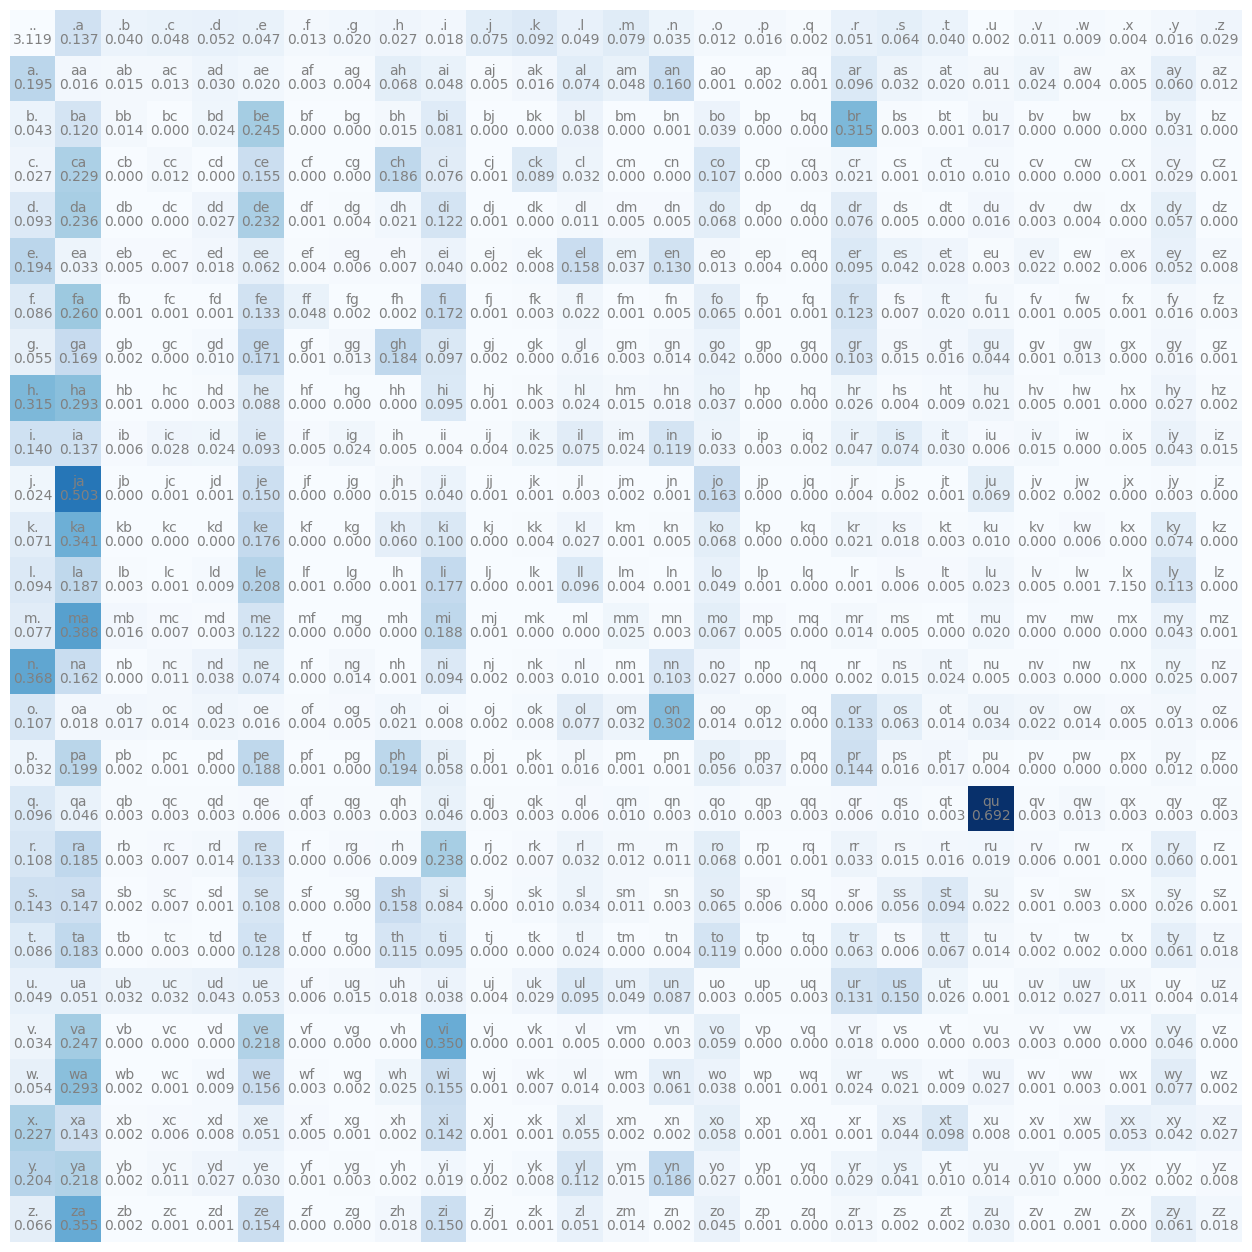

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(P, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, str(P[i, j].item())[:5] , ha="center", va="top", color='gray')
plt.axis('off')

### 25 names Bigram

Generation of 25 names using the bigram frequency table

In [29]:
#Set the grain to any number you like
seed = 169783

g = torch.Generator().manual_seed(seed)

for i in range(25):

  out = []
  ix = 0 #zaczynamy generacje od kropki, indeks kropki to 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0: #jesli wylosujemy kropke to konczymy generacje
      break
  print(''.join(out))

kia.
ta.
karben.
kh.
ah.
vrduie.
anon.
zelelayngalelen.
jaanad.
jietayia.
mee.
lia.
gay.
talahnorerryrinacy.
aricelpe.
kouss.
tarona.
arin.
asaylelda.
akis.
iantoetronahetrd.
tr.
amorailalele.
ra.
etever.


### 25 random Bigram names

25 names assuming that each token has the same probability of being the next token (character) in the word.

In [35]:
M = torch.ones((27, 27), dtype=torch.int32)
PP = M.float()/27

g = torch.Generator().manual_seed(seed)

random_names = []

for i in range(25):
  out = []
  ix = 0
  while True:
    pp = PP[ix]
    ix = torch.multinomial(pp, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))
  random_names.append(''.join(out))

pibktktkqgbtnbuptxekvldsiewatqxmgkbmljyhgjlvaoupjkayad.
ixujnyiaqmre.
.
iaggmo.
talfqxorjjrgrgnucyxhrccpqpqubmqsb.
tkroaaoqjbndaswyibidtwtkjhpijwtoetvoovwgtmdwtggabfrtgxrewiu.
rm.
etdomrbolvpqtim.
yjzdqoejglksawocxrjlvqoyfcdxxremtacecyttvqlae.
sf.
ysjkxfrrqqtq.
dxmwckjpoxzeyyulpdua.
eptimr.
.
wfljqmatleysqzgmszmfabxxy.
nlktxbrlbcbuulaflzzjiacuoyxpzrakisqxynqkwkw.
ebzfndgpsvr.
ifblcpetqacfiuubaalhakgdulicx.
ralwbmfhkoppyjwozaqqeuzsijepda.
pqnvysvfcnobhorkjhlcmvqxtwohaoyyehuoerzrvdgamr.
.
ugmbeqjfmxtbhvrfarmgtfjujrzgbtyxpmlynpn.
vyqcxtyluqitfcqxyjgnvgg.
perbeggdfdgpdcafvrjadiqjwfnckpptrpkvbvtnaiabdvtcxiuvydqz.
qkgkaavytndhfsymstxwsdjpejxefzh.


### Calculation of the cost/error function for a single name, the entire collection and randomly generated words

In [33]:
#Entire Collection
log_likelihood = 0.0
n = 0

for w in names[:25]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]

    logprob = -1*torch.log(prob)
    log_likelihood += logprob
    n += 1
  
  print(f'{w}  : {log_likelihood/n:.4f}')

emma  : 2.5143
olivia  : 2.5078
ava  : 2.4255
isabella  : 2.4135
sophia  : 2.4320
charlotte  : 2.4555
mia  : 2.4118
amelia  : 2.3630
harper  : 2.4231
evelyn  : 2.3944
abigail  : 2.4335
emily  : 2.4301
elizabeth  : 2.4292
mila  : 2.4077
ella  : 2.3927
avery  : 2.3888
sofia  : 2.4059
camila  : 2.3913
aria  : 2.3706
scarlett  : 2.3992
victoria  : 2.4077
madison  : 2.3900
luna  : 2.3946
grace  : 2.4022
chloe  : 2.4185


In [34]:
#Single word

#Insert english name (in lowercase)
#e.g. first_name='andrei'

first_name = 'piotr'

log_likelihood = 0.0
n = 0

for w in [first_name]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]

    logprob = -1*torch.log(prob)
    log_likelihood += logprob
    n += 1
  
  print(f'{w}  : {log_likelihood/n:.4f}')

piotr  : 3.2593


In [36]:
#Randomly generated words

log_likelihood = 0.0
n = 0

for w in random_names:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]

    logprob = -1*torch.log(prob)
    log_likelihood += logprob
    n += 1
  
  print(f'{w}  : {log_likelihood/n:.4f}')

pibktktkqgbtnbuptxekvldsiewatqxmgkbmljyhgjlvaoupjkayad.  : 5.5348
ixujnyiaqmre.  : 5.3572
.  : 5.4966
iaggmo.  : 5.4034
talfqxorjjrgrgnucyxhrccpqpqubmqsb.  : 5.2806
tkroaaoqjbndaswyibidtwtkjhpijwtoetvoovwgtmdwtggabfrtgxrewiu.  : 5.1874
rm.  : 5.1847
etdomrbolvpqtim.  : 5.1526
yjzdqoejglksawocxrjlvqoyfcdxxremtacecyttvqlae.  : 5.1562
sf.  : 5.1677
ysjkxfrrqqtq.  : 5.1994
dxmwckjpoxzeyyulpdua.  : 5.1873
eptimr.  : 5.1668
.  : 5.2022
wfljqmatleysqzgmszmfabxxy.  : 5.1789
nlktxbrlbcbuulaflzzjiacuoyxpzrakisqxynqkwkw.  : 5.1445
ebzfndgpsvr.  : 5.1587
ifblcpetqacfiuubaalhakgdulicx.  : 5.1185
ralwbmfhkoppyjwozaqqeuzsijepda.  : 5.0935
pqnvysvfcnobhorkjhlcmvqxtwohaoyyehuoerzrvdgamr.  : 5.0808
.  : 5.1024
ugmbeqjfmxtbhvrfarmgtfjujrzgbtyxpmlynpn.  : 5.1261
vyqcxtyluqitfcqxyjgnvgg.  : 5.1274
perbeggdfdgpdcafvrjadiqjwfnckpptrpkvbvtnaiabdvtcxiuvydqz.  : 5.1135
qkgkaavytndhfsymstxwsdjpejxefzh.  : 5.1108


## BIGRAM on Neural Network

In [37]:
#Create the training set of bigrams (x,y)
#x - features (arguments)
#y - answers (function value for arguments)

xs, ys = [], []

for w in names[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


### ONE-HOT Format

Graphical representation of the xs array

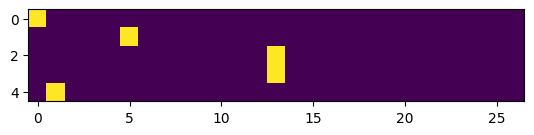

In [40]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
plt.imshow(xenc)

Graphical representation of the ys array

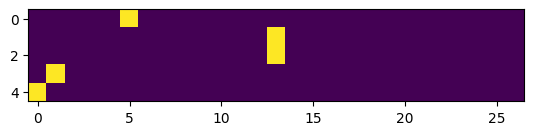

In [41]:
import torch.nn.functional as F
yenc = F.one_hot(ys, num_classes=27).float()
plt.imshow(yenc)

#### A demonstration of multiplying an array of tokens in ONE-HOT by a WAG array. The resulting array corresponds to an N array with probabilities but there is one problem that some cells are negative.

In [42]:
W = torch.randn((27, 27))
xenc @ W

tensor([[ 0.4062, -0.4968,  0.1807,  1.6154,  0.5081,  0.8118,  0.0789,  0.7188,
          1.5499, -0.6783, -0.2272, -1.1363, -0.7092,  1.3141,  0.6104,  1.4313,
         -0.9943, -0.2117, -0.2845,  0.5151, -0.0971,  0.8429, -0.5608, -0.7670,
          0.1495,  1.3987,  1.6525],
        [ 0.9704, -1.2678,  0.8076,  1.1400,  0.2845,  0.2578,  0.0226,  0.4815,
          1.0307, -0.2213,  0.6751,  1.5728, -0.8436,  0.5996, -1.1914, -1.5585,
         -0.8763, -1.2191, -0.7390, -1.1437, -0.9682,  0.6163,  0.8430,  0.0793,
          1.8295,  1.0637,  0.6726],
        [-0.8506, -1.2371,  0.0172, -0.0788, -0.7209,  0.5061,  1.5186,  0.2654,
         -1.5500,  0.3082, -0.5867, -0.5906,  1.0453,  0.6864,  0.4987,  0.3710,
         -0.5276, -1.7661, -0.7709, -0.5018,  0.8668, -1.5482,  0.2432, -0.1968,
          0.1929, -0.3426, -1.1288],
        [-0.8506, -1.2371,  0.0172, -0.0788, -0.7209,  0.5061,  1.5186,  0.2654,
         -1.5500,  0.3082, -0.5867, -0.5906,  1.0453,  0.6864,  0.4987,  0.3710

### The course of calculations in the neural network for an array of tokens in one hot format, so as to get probabilities

In [43]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N

probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0299, 0.0121, 0.0238, 0.1001, 0.0331, 0.0448, 0.0215, 0.0408, 0.0937,
         0.0101, 0.0159, 0.0064, 0.0098, 0.0740, 0.0366, 0.0832, 0.0074, 0.0161,
         0.0150, 0.0333, 0.0181, 0.0462, 0.0114, 0.0092, 0.0231, 0.0806, 0.1039],
        [0.0587, 0.0063, 0.0499, 0.0696, 0.0296, 0.0288, 0.0228, 0.0360, 0.0624,
         0.0178, 0.0437, 0.1073, 0.0096, 0.0405, 0.0068, 0.0047, 0.0093, 0.0066,
         0.0106, 0.0071, 0.0085, 0.0412, 0.0517, 0.0241, 0.1386, 0.0645, 0.0436],
        [0.0142, 0.0097, 0.0339, 0.0308, 0.0162, 0.0552, 0.1519, 0.0434, 0.0071,
         0.0453, 0.0185, 0.0184, 0.0947, 0.0661, 0.0548, 0.0482, 0.0196, 0.0057,
         0.0154, 0.0201, 0.0792, 0.0071, 0.0424, 0.0273, 0.0404, 0.0236, 0.0108],
        [0.0142, 0.0097, 0.0339, 0.0308, 0.0162, 0.0552, 0.1519, 0.0434, 0.0071,
         0.0453, 0.0185, 0.0184, 0.0947, 0.0661, 0.0548, 0.0482, 0.0196, 0.0057,
         0.0154, 0.0201, 0.0792, 0.0071, 0.0424, 0.0273, 0.0404, 0.0236, 0.0108],
        [0.0229, 0.0143,

### Array of weights W neural network layer

In [44]:
seed = 169783
g = torch.Generator().manual_seed(seed)
W = torch.randn((27, 27), generator=g)

print(W)

tensor([[-1.3407e+00,  1.5251e+00,  1.9667e+00,  5.5173e-02,  1.7263e-01,
          1.6940e+00, -1.4619e+00,  1.1884e+00, -6.3073e-01,  3.0689e-01,
         -1.1016e-03,  1.3866e+00, -1.5890e-01, -8.9162e-01, -3.8883e-01,
          4.2977e-01, -2.3629e-01, -9.7683e-01, -2.8509e-02,  1.1397e+00,
         -1.1029e+00, -2.2378e-01,  2.4383e+00,  3.8661e-01, -2.7621e-01,
         -1.8532e+00, -1.6110e+00],
        [-2.1259e-01,  4.5323e-01,  1.8987e+00,  4.2912e-01,  7.4380e-01,
          9.2637e-02,  1.3789e+00, -3.1137e-01,  7.3216e-01, -2.9978e-01,
          6.2649e-01, -6.5771e-01,  9.6784e-03,  1.0760e+00,  6.2532e-01,
         -1.1827e+00,  3.4224e-01, -1.2468e+00, -8.9170e-01, -1.3410e+00,
          4.8191e-01,  9.4819e-01,  1.7068e+00, -8.0605e-01,  1.4915e-01,
          1.0347e+00, -1.0092e+00],
        [-5.2618e-01,  9.6572e-01,  1.4028e+00, -4.9744e-02,  2.4806e-01,
          1.0683e+00,  2.8028e-02,  7.7042e-01, -1.1874e+00,  1.1630e+00,
          1.5742e-01, -2.0310e-01, -1.04

In [45]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character

In [46]:
print(probs)
print('')
print(probs.shape)

tensor([[0.0048, 0.0851, 0.1323, 0.0196, 0.0220, 0.1007, 0.0043, 0.0608, 0.0099,
         0.0252, 0.0185, 0.0741, 0.0158, 0.0076, 0.0126, 0.0285, 0.0146, 0.0070,
         0.0180, 0.0579, 0.0061, 0.0148, 0.2121, 0.0273, 0.0140, 0.0029, 0.0037],
        [0.0246, 0.0328, 0.0240, 0.0716, 0.0146, 0.0350, 0.0260, 0.0036, 0.0132,
         0.0470, 0.0099, 0.0418, 0.0594, 0.0047, 0.2134, 0.0299, 0.0851, 0.0534,
         0.0079, 0.0111, 0.0233, 0.0211, 0.0882, 0.0079, 0.0203, 0.0118, 0.0182],
        [0.0760, 0.0065, 0.0328, 0.0825, 0.0046, 0.0643, 0.0240, 0.0246, 0.0263,
         0.0161, 0.0634, 0.0124, 0.0021, 0.0164, 0.0214, 0.0279, 0.0087, 0.0153,
         0.0086, 0.0187, 0.0048, 0.0225, 0.0140, 0.0217, 0.3147, 0.0437, 0.0260],
        [0.0760, 0.0065, 0.0328, 0.0825, 0.0046, 0.0643, 0.0240, 0.0246, 0.0263,
         0.0161, 0.0634, 0.0124, 0.0021, 0.0164, 0.0214, 0.0279, 0.0087, 0.0153,
         0.0086, 0.0187, 0.0048, 0.0225, 0.0140, 0.0217, 0.3147, 0.0437, 0.0260],
        [0.0173, 0.0337,

### Loss made in generation of name .emma. by unlearned network

In [47]:
nlls = torch.zeros(5)
for i in range(5):
  x = xs[i].item()
  y = ys[i].item()

  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)

  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())

  logp = torch.log(p)
  print('log likelihood:', logp.item())

  nll = -logp
  print('negative log likelihood:', nll.item())
  
  nlls[i] = nll

print('=========')
print('=========')
print('=========')

print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0048, 0.0851, 0.1323, 0.0196, 0.0220, 0.1007, 0.0043, 0.0608, 0.0099,
        0.0252, 0.0185, 0.0741, 0.0158, 0.0076, 0.0126, 0.0285, 0.0146, 0.0070,
        0.0180, 0.0579, 0.0061, 0.0148, 0.2121, 0.0273, 0.0140, 0.0029, 0.0037])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.10074136406183243
log likelihood: -2.295198917388916
negative log likelihood: 2.295198917388916
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0246, 0.0328, 0.0240, 0.0716, 0.0146, 0.0350, 0.0260, 0.0036, 0.0132,
        0.0470, 0.0099, 0.0418, 0.0594, 0.0047, 0.2134, 0.0299, 0.0851, 0.0534,
        0.0079, 0.0111, 0.0233, 0.0211, 0.0882, 0.0079, 0.0203, 0.0118, 0.0182])
label (actual next character): 13
probability assigned by the net to the the correct character: 0.

### Neural Network

In [48]:
#Randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(169783)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [49]:
#Forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()

In [50]:
#Backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [51]:
# Update weights to better values as we have done so far 
#0.1 is learning rate
#W.grad is the derivative (by conjecture, the derivative of the cost function after the weights)

W.data += -0.1 * W.grad

### Creating a learning set, y's - are sequences of tokens shifted by one to the right relative to x's

In [52]:
seed= 169783

#Create the dataset
xs, ys = [], []
for w in names:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

#Initialize the 'network'
g = torch.Generator().manual_seed(seed)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


### Training network

In [53]:
learning_rate = 1.5
epochs = 1500

#Gradient descent
for k in range(epochs):

  #Forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())

  #Backward pass
  W.grad = None # set to zero the gradient
  loss.backward()

  #Update weights
  W.data += - learning_rate * W.grad

3.7474396228790283
3.733698606491089
3.7201929092407227
3.7069144248962402
3.693855047225952
3.6810054779052734
3.6683595180511475
3.655910015106201
3.643650531768799
3.6315760612487793
3.6196813583374023
3.607962131500244
3.596412420272827
3.585029363632202
3.573807954788208
3.5627448558807373
3.551837205886841
3.541081190109253
3.530473470687866
3.5200109481811523
3.5096914768218994
3.49951171875
3.4894707202911377
3.479564905166626
3.4697911739349365
3.4601495265960693
3.4506356716156006
3.4412500858306885
3.43198823928833
3.4228506088256836
3.4138338565826416
3.404937267303467
3.3961586952209473
3.387495994567871
3.378948926925659
3.3705148696899414
3.3621928691864014
3.3539814949035645
3.345879077911377
3.3378841876983643
3.32999587059021
3.3222122192382812
3.314532995223999
3.3069558143615723
3.2994797229766846
3.2921035289764404
3.2848262786865234
3.2776458263397217
3.2705624103546143
3.2635738849639893
3.2566792964935303
3.2498772144317627
3.243166923522949
3.236546754837036
3.

### 25 names generated by NN

In [54]:
g = torch.Generator().manual_seed(2147483647)

for i in range(25):

  out = []
  ix = 0
  while True:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W
    counts = logits.exp()
    p = counts / counts.sum(1, keepdims=True)
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
pyllay.
a.
nn.
kai.
ritolian.
jgee.
ksaheiauyanilevias.
dbdainrwieta.
sejaielylarte.
faveumerifontumjan.
nnslenaruani.
core.
yaenon.
ka.
jabdinerimiin.
wynin.
anaasn.
ssorionszah.
dgosfintan.
il.
le.
phan.
that.


## Word2Vec - CBOW

#### Author: Srijith Rajamohan based off the work by Robert Guthrie


In [55]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import urllib.request
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk import word_tokenize
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances

In [56]:
torch.manual_seed(169783)

In [57]:
#In context_size we specify the number of words of the sequence based on which we predict the next word
CONTEXT_SIZE = 3

#Size of the vector representation of the token (word)
EMBEDDING_DIM = 10

#The text is divided into single words so as to create tokens
test_sentence = """Empathy for the poor may not come easily to people who never experienced it. They may blame the victims and insist their predicament can be overcome through determination and hard work.
But they may not realize that extreme poverty can be psychologically and physically incapacitating — a perpetual cycle of bad diets, health care and education exacerbated by the shaming and self-fulfilling prophecies that define it in the public imagination.
Gordon Parks — perhaps more than any artist — saw poverty as “the most savage of all human afflictions” and realized the power of empathy to help us understand it. It was neither an abstract problem nor political symbol, but something he endured growing up destitute in rural Kansas and having spent years documenting poverty throughout the world, including the United States.
That sensitivity informed “Freedom’s Fearful Foe: Poverty,” his celebrated photo essay published in Life magazine in June 1961. He took readers into the lives of a Brazilian boy, Flavio da Silva, and his family, who lived in the ramshackle Catacumba favela in the hills outside Rio de Janeiro. These stark photographs are the subject of a new book, “Gordon Parks: The Flavio Story” (Steidl/The Gordon Parks Foundation), which accompanies a traveling exhibition co-organized by the Ryerson Image Centre in Toronto, where it opens this week, and the J. Paul Getty Museum. Edited with texts by the exhibition’s co-curators, Paul Roth and Amanda Maddox, the book also includes a recent interview with Mr. da Silva and essays by Beatriz Jaguaribe, Maria Alice Rezende de Carvalho and Sérgio Burgi.
""".split()

### How many characters and how many words there are

In [58]:
char_num = 0
for item in test_sentence:
  for letter in item:
    char_num += 1
print(char_num)

1356


In [59]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

#Function that takes the text from the specified URL and cleans it up
def read_data(file_path):
    data = urllib.request.urlopen(file_path)
    data = data.read().decode('utf8')
    tokenized_data = word_tokenize(data)

    stop_words = set(stopwords.words('english'))

    stop_words.update(['.',',',':',';','(',')','#','--','...','"'])
    cleaned_words = [ i for i in tokenized_data if i not in stop_words ]
    
    return(cleaned_words)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Piotrek\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Piotrek\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


### Creation of learining set

In [61]:
ngrams = []
for i in range(len(test_sentence) - CONTEXT_SIZE):
    tup = [test_sentence[j] for j in np.arange(i , i + CONTEXT_SIZE) ]
    ngrams.append((tup,test_sentence[i + CONTEXT_SIZE]))

In [62]:
#What a single ngram looks like
print(ngrams[0])
print(ngrams[1])
print(ngrams[2])

(['Empathy', 'for', 'the'], 'poor')
(['for', 'the', 'poor'], 'may')
(['the', 'poor', 'may'], 'not')


In [63]:
#What all ngrams look like
for ngram in ngrams:
  print(ngram)

(['Empathy', 'for', 'the'], 'poor')
(['for', 'the', 'poor'], 'may')
(['the', 'poor', 'may'], 'not')
(['poor', 'may', 'not'], 'come')
(['may', 'not', 'come'], 'easily')
(['not', 'come', 'easily'], 'to')
(['come', 'easily', 'to'], 'people')
(['easily', 'to', 'people'], 'who')
(['to', 'people', 'who'], 'never')
(['people', 'who', 'never'], 'experienced')
(['who', 'never', 'experienced'], 'it.')
(['never', 'experienced', 'it.'], 'They')
(['experienced', 'it.', 'They'], 'may')
(['it.', 'They', 'may'], 'blame')
(['They', 'may', 'blame'], 'the')
(['may', 'blame', 'the'], 'victims')
(['blame', 'the', 'victims'], 'and')
(['the', 'victims', 'and'], 'insist')
(['victims', 'and', 'insist'], 'their')
(['and', 'insist', 'their'], 'predicament')
(['insist', 'their', 'predicament'], 'can')
(['their', 'predicament', 'can'], 'be')
(['predicament', 'can', 'be'], 'overcome')
(['can', 'be', 'overcome'], 'through')
(['be', 'overcome', 'through'], 'determination')
(['overcome', 'through', 'determination'], '

In [64]:
#How many ngrams are there
print(len(ngrams))

vocab = set(test_sentence)
print(vocab)

256
{'victims', 'determination', 'Maddox,', 'their', 'Museum.', 'human', 'Parks:', 'de', 'Beatriz', 'celebrated', 'Jaguaribe,', 'Roth', 'poor', 'was', 'da', 'in', 'throughout', 'and', 'care', 'Paul', 'us', 'June', 'it', 'realized', 'his', 'sensitivity', 'J.', 'any', 'United', 'Silva', 'work.', 'Toronto,', 'a', 'book', 'self-fulfilling', 'power', 'opens', 'physically', 'than', 'Image', 'co-curators,', 'book,', 'where', 'health', 'growing', 'they', 'spent', 'neither', 'Rio', 'Brazilian', 'outside', 'which', 'Mr.', 'psychologically', 'destitute', 'also', 'Fearful', 'can', 'years', 'essays', 'But', 'symbol,', 'problem', 'predicament', 'lived', 'an', 'ramshackle', 'boy,', 'savage', 'including', 'readers', 'Getty', 'into', 'define', 'perpetual', '1961.', 'experienced', '—', 'saw', 'exacerbated', 'informed', 'Silva,', 'understand', '“Freedom’s', 'help', 'Maria', 'subject', 'recent', 'includes', 'hard', 'shaming', 'he', 'not', 'photographs', 'up', 'be', 'of', 'Ryerson', 'overcome', 'endured', 

### Create a word_to_ix (word per index) dictionary that assigns each token a unique number (index)

In [65]:
vocab = set(test_sentence)
print("Length of vocabulary",len(vocab))

word_to_ix = {word: i for i, word in enumerate(vocab)}

for key in word_to_ix.keys():
  print(key, word_to_ix[key])

Length of vocabulary 195
victims 0
determination 1
Maddox, 2
their 3
Museum. 4
human 5
Parks: 6
de 7
Beatriz 8
celebrated 9
Jaguaribe, 10
Roth 11
poor 12
was 13
da 14
in 15
throughout 16
and 17
care 18
Paul 19
us 20
June 21
it 22
realized 23
his 24
sensitivity 25
J. 26
any 27
United 28
Silva 29
work. 30
Toronto, 31
a 32
book 33
self-fulfilling 34
power 35
opens 36
physically 37
than 38
Image 39
co-curators, 40
book, 41
where 42
health 43
growing 44
they 45
spent 46
neither 47
Rio 48
Brazilian 49
outside 50
which 51
Mr. 52
psychologically 53
destitute 54
also 55
Fearful 56
can 57
years 58
essays 59
But 60
symbol, 61
problem 62
predicament 63
lived 64
an 65
ramshackle 66
boy, 67
savage 68
including 69
readers 70
Getty 71
into 72
define 73
perpetual 74
1961. 75
experienced 76
— 77
saw 78
exacerbated 79
informed 80
Silva, 81
understand 82
“Freedom’s 83
help 84
Maria 85
subject 86
recent 87
includes 88
hard 89
shaming 90
he 91
not 92
photographs 93
up 94
be 95
of 96
Ryerson 97
overcome 98
e

#### Below is the code that:

##### 1. Returns a token having its index
##### 2. Clusters a set of words in vector form
##### 3. Clears the corpus from a file loaded from the internet

In [66]:
def get_key(word_id):
    for key, val in word_to_ix.items():
        if(val == word_id):
            print(key)

def cluster_embeddings(filename,nclusters):
    X = np.load(filename)
    kmeans = KMeans(n_clusters=nclusters, random_state=0).fit(X)
    center = kmeans.cluster_centers_
    distances = euclidean_distances(X,center)

    for i in np.arange(0,distances.shape[1]):
        word_id = np.argmin(distances[:,i])
        print(word_id)
        get_key(word_id)

### Definition of CBOW network in PyTorch

In [67]:
class CBOWModeler(nn.Module):
    def __init__(self, vocab_size, embedding_dim, context_size):
        super(CBOWModeler, self).__init__()
        
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(context_size * embedding_dim, 128)
        
        self.linear2 = nn.Linear(128, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1, -1))
        
        out1 = F.relu(self.linear1(embeds))
        
        out2 = self.linear2(out1)
        
        
        log_probs = F.log_softmax(out2, dim=1)
        return log_probs

    def predict(self,input):
        
        context_idxs = torch.tensor([word_to_ix[w] for w in input], dtype=torch.long)
        res = self.forward(context_idxs)
        
        res_arg = torch.argmax(res)

        res_val, res_ind = res.sort(descending=True)
        res_val = res_val[0][:3]
        res_ind = res_ind[0][:3]
        
        for arg in zip(res_val,res_ind):
            print(arg)
            print([(key,val,arg[0]) for key,val in word_to_ix.items() if val == arg[1]])

    def freeze_layer(self,layer):
        for name,child in model.named_children():
            print(name,child)
            if(name == layer):
                for names,params in child.named_parameters():
                    print(names,params)
                    print(params.size())
                    params.requires_grad= False

    def print_layer_parameters(self):
        for name,child in model.named_children():
                print(name,child)
                for names,params in child.named_parameters():
                    print(names,params)
                    print(params.size())

    def write_embedding_to_file(self,filename):
        #zmienna "i" reprezentuje token
        for i in self.embeddings.parameters():
            weights = i.data.numpy()
        np.save(filename,weights)

### Creating and training the model

In [68]:
losses = []

loss_function = nn.NLLLoss()

model = CBOWModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)

optimizer = optim.SGD(model.parameters(), lr=0.001)


for epoch in range(400):
    total_loss = 0

    for context, target in ngrams:
        context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long)
        
        model.zero_grad()

        log_probs = model(context_idxs)
        
        loss = loss_function(log_probs, torch.tensor([word_to_ix[target]], dtype=torch.long))
        
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(total_loss)
    losses.append(total_loss)

1366.1696581840515
1357.629635334015
1349.2104659080505
1340.906376361847
1332.7010207176208
1324.5819025039673
1316.5472507476807
1308.5902247428894
1300.7016372680664
1292.8804433345795
1285.1230466365814
1277.4283468723297
1269.7951321601868
1262.2240900993347
1254.7171623706818
1247.274554014206
1239.895521402359
1232.5767455101013
1225.3238818645477
1218.1352446079254
1211.0079576969147
1203.9463950395584
1196.9496930837631
1190.0166110992432
1183.143727183342
1176.3202248811722
1169.538295507431
1162.7916812896729
1156.085855603218
1149.4071865081787
1142.7486153244972
1136.0957639217377
1129.4481235146523
1122.8021284341812
1116.1361406445503
1109.4522985219955
1102.7400341629982
1095.9996839761734
1089.2332201004028
1082.4290834665298
1075.5933635234833
1068.7159637212753
1061.7887015938759
1054.818372875452
1047.7976743876934
1040.724126458168
1033.59441614151
1026.4025447964668
1019.1490991711617
1011.8399129807949
1004.4573684036732
997.013248860836
989.5023423433304
981.924

In [69]:
#Print the model layer parameters
model.print_layer_parameters()

embeddings Embedding(195, 10)
weight Parameter containing:
tensor([[-1.3695,  1.5902,  2.0380,  ...,  1.2293, -0.6474,  0.2603],
        [-0.0108,  1.4344, -0.1437,  ..., -0.9932, -0.0442,  1.1649],
        [-1.1573, -0.2260,  2.5278,  ..., -0.1824,  0.4496,  1.9728],
        ...,
        [-1.3760,  0.7177,  0.5835,  ...,  0.4602,  0.3313, -0.5516],
        [-0.2141, -1.0251,  0.5210,  ..., -1.0318, -0.4491, -1.0420],
        [ 0.9740, -0.5416, -0.0475,  ...,  0.2108,  1.4694, -1.1384]],
       requires_grad=True)
torch.Size([195, 10])
linear1 Linear(in_features=30, out_features=128, bias=True)
weight Parameter containing:
tensor([[ 0.2512, -0.0051, -0.2162,  ..., -0.2825, -0.1303,  0.2243],
        [-0.3495,  0.4166,  0.3076,  ..., -0.1333, -0.1725,  0.2275],
        [-0.3984,  0.4192,  0.0013,  ..., -0.3170, -0.4121,  0.2243],
        ...,
        [ 0.1553, -0.4183, -0.0797,  ..., -0.2576,  0.2427,  0.2423],
        [ 0.1060, -0.2383,  0.0409,  ...,  0.2309,  0.1361,  0.1800],
      

In [70]:
#Predict the next word given n context words
print(model.predict(['of','all','human']))

print(model.predict(['he','was','not']))

(tensor(-0.0381, grad_fn=<UnbindBackward0>), tensor(186))
[('afflictions”', 186, tensor(-0.0381, grad_fn=<UnbindBackward0>))]
(tensor(-3.9822, grad_fn=<UnbindBackward0>), tensor(104))
[('it.', 104, tensor(-3.9822, grad_fn=<UnbindBackward0>))]
(tensor(-6.1719, grad_fn=<UnbindBackward0>), tensor(110))
[('the', 110, tensor(-6.1719, grad_fn=<UnbindBackward0>))]
None
(tensor(-1.6265, grad_fn=<UnbindBackward0>), tensor(15))
[('in', 15, tensor(-1.6265, grad_fn=<UnbindBackward0>))]
(tensor(-1.9443, grad_fn=<UnbindBackward0>), tensor(96))
[('of', 96, tensor(-1.9443, grad_fn=<UnbindBackward0>))]
(tensor(-2.5847, grad_fn=<UnbindBackward0>), tensor(45))
[('they', 45, tensor(-2.5847, grad_fn=<UnbindBackward0>))]
None


#### The vector representations of words (tokens) are cached in the model.embeddings array. We export them to a file with the extension .npy

In [71]:
model.write_embedding_to_file('embeddings.npy')
embeddings = np.load('embeddings.npy')
embeddings

array([[-1.369455  ,  1.5901684 ,  2.0379608 , ...,  1.2293129 ,
        -0.64736426,  0.26026532],
       [-0.01082055,  1.434422  , -0.14367664, ..., -0.9932431 ,
        -0.04422539,  1.1648631 ],
       [-1.1572784 , -0.2259593 ,  2.5278478 , ..., -0.18244912,
         0.44960362,  1.9728494 ],
       ...,
       [-1.375971  ,  0.7176802 ,  0.5835035 , ...,  0.46016496,
         0.33129948, -0.5515701 ],
       [-0.21405041, -1.0250992 ,  0.52101797, ..., -1.0317901 ,
        -0.44912422, -1.0419525 ],
       [ 0.97404945, -0.54160166, -0.04754765, ...,  0.21084273,
         1.4693782 , -1.138418  ]], dtype=float32)

## Data clustering using the k-means algorithm - grouping tokens into separate clusters

In [72]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [73]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(N)

c:\Users\Piotrek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Visualisation using TSNE

In [75]:
tsne = TSNE(n_components=2, random_state=0, perplexity=5)
N_embedded = tsne.fit_transform(N)

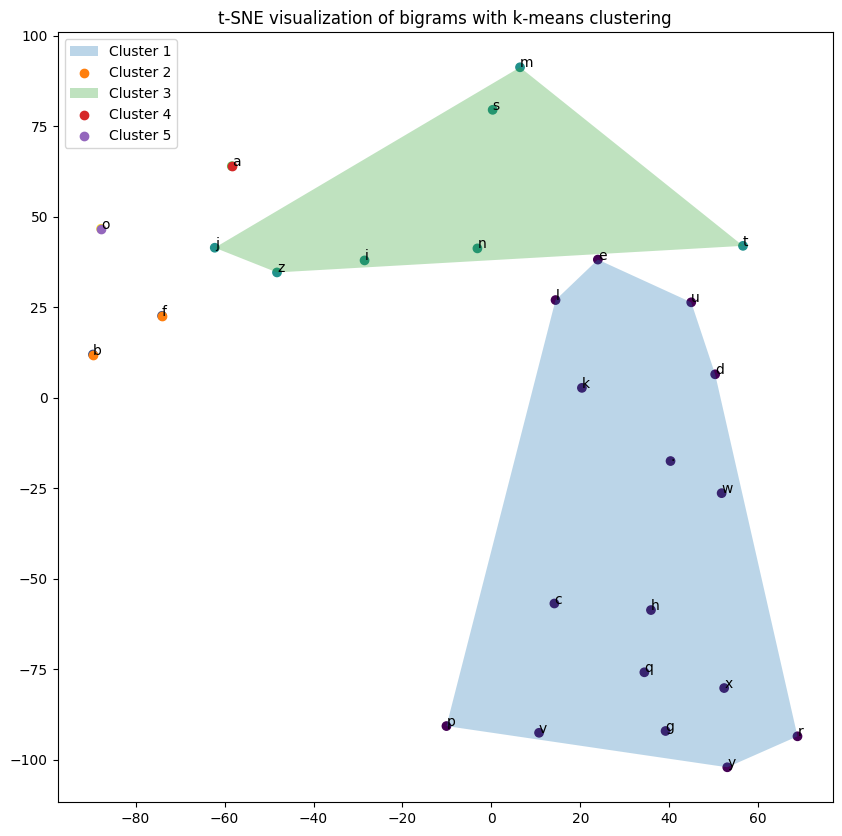

In [79]:
from scipy.spatial import ConvexHull
#Visualize the clusters with convex hulls
plt.figure(figsize=(10, 10))
plt.scatter(N_embedded[:, 0], N_embedded[:, 1], c=kmeans.labels_, cmap='viridis')

#Add convex hulls to visualize clusters
for i in range(5):
    points = N_embedded[kmeans.labels_ == i]
    if len(points) >= 3:  # Check if there are enough points to create a convex hull
        hull = ConvexHull(points)
        x_hull = np.append(points[hull.vertices, 0], points[hull.vertices, 0][0])
        y_hull = np.append(points[hull.vertices, 1], points[hull.vertices, 1][0])
        plt.fill(x_hull, y_hull, alpha=0.3, label=f'Cluster {i+1}')
    else:
        plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {i+1}')

#Annotate each point with the corresponding bigram
for i, txt in enumerate(itos.values()):
    plt.annotate(txt, (N_embedded[i, 0], N_embedded[i, 1]))

plt.title("t-SNE visualization of bigrams with k-means clustering")
plt.legend()
plt.show()

## Training algorithm on polish text

In [126]:
#In context_size we specify the number of words of the sequence based on which we predict the next word
CONTEXT_SIZE = 2

#Size of the vector representation of the token (word)
EMBEDDING_DIM = 10

new_text = """
W nocnym mieście, gdzie światła neonów odbijały się od deszczowej nawierzchni, wąskie uliczki tkały labirynt, w którym gubiły się dusze zapomniane przez czas. W jednym z tych zaułków, gdzie zapach smogu mieszał się z wonią gnijących liści, znajdowała się "Klinika Marzeń".
Nie było to miejsce dla tych, którzy mieli czyste sumienia. Dr Gideon prowadził swoją praktykę poza granicami prawa i etyki. Ludzie z całego miasta przychodzili do niego, by wymienić część swojej duszy na coś, o czym marzyli najbardziej. Cena była wysoka, ale dla wielu warta zapłacenia.
Kiedyś przyszła do niego kobieta, której marzenie było powrócić do dnia, kiedy jej mąż jeszcze żył. Dr Gideon wyciągnął z jej wnętrza wspomnienia, by mogła przeżyć te chwile na nowo, chociaż na chwilę.
Innym razem przyszedł do niego mężczyzna, któremu marzyło się nieśmiertelność. Dr Gideon zaoferował mu wieczność, odbierając w zamian zdolność do odczuwania emocji. Mężczyzna stał się cieniem, który mijał ludzi niezauważony, samotny wśród tłumu.
Ale cena za takie marzenia nigdy nie była jedynym kosztem. Dr Gideon zbierał długi, których nie można było spłacić. Kiedyś, pewnego deszczowego wieczoru, zjawił się tam ktoś inny. Postać w płaszczu, bez twarzy, która przyniosła ze sobą odwrócone karty losu.
"Twoja praktyka dobiega końca," powiedziała cichym głosem. Dr Gideon uniósł wzrok, wiedząc, że nie ma ucieczki. "Klinika Marzeń" zniknęła z miasta tej samej nocy, ale opowieść o niej przetrwała, choć już nikt nie śmiał snuć marzeń w jej ciemnych zakamarkach.
""".split()

In [127]:
nltk.download('punkt')
nltk.download('stopwords')

#Function that takes the text from the specified URL and cleans it up
def read_data(file_path):
    data = urllib.request.urlopen(file_path)
    data = data.read().decode('utf8')
    tokenized_data = word_tokenize(data)

    stop_words = set(stopwords.words('english'))

    stop_words.update(['.',',',':',';','(',')','#','--','...','"'])
    cleaned_words = [ i for i in tokenized_data if i not in stop_words ]
    
    return(cleaned_words)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Piotrek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Piotrek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [128]:
ngrams = []
for i in range(len(new_text) - CONTEXT_SIZE):
    tup = [new_text[j] for j in np.arange(i , i + CONTEXT_SIZE) ]
    ngrams.append((tup,new_text[i + CONTEXT_SIZE]))

In [129]:
vocab = set(new_text)
print("Length of vocabulary",len(vocab))

word_to_ix = {word: i for i, word in enumerate(vocab)}

for key in word_to_ix.keys():
  print(key, word_to_ix[key])

Length of vocabulary 189
liści, 0
poza 1
zbierał 2
ciemnych 3
chociaż 4
przeżyć 5
ucieczki. 6
Cena 7
cena 8
Kiedyś 9
nieśmiertelność. 10
Ale 11
cieniem, 12
którym 13
przyszedł 14
wieczoru, 15
o 16
wnętrza 17
zdolność 18
stał 19
za 20
płaszczu, 21
bez 22
która 23
odwrócone 24
zniknęła 25
gnijących 26
losu. 27
Kiedyś, 28
czym 29
mieszał 30
część 31
zamian 32
że 33
kobieta, 34
zakamarkach. 35
sumienia. 36
twarzy, 37
gdzie 38
tkały 39
chwilę. 40
emocji. 41
gubiły 42
marzenie 43
znajdowała 44
opowieść 45
Nie 46
ze 47
było 48
wśród 49
ktoś 50
"Twoja 51
była 52
całego 53
na 54
swojej 55
zaoferował 56
pewnego 57
czyste 58
zapomniane 59
przetrwała, 60
przyniosła 61
wyciągnął 62
tej 63
dusze 64
razem 65
jedynym 66
nikt 67
Marzeń". 68
nocy, 69
choć 70
od 71
odczuwania 72
mogła 73
zjawił 74
marzyli 75
deszczowej 76
swoją 77
któremu 78
długi, 79
której 80
karty 81
wonią 82
niezauważony, 83
dnia, 84
tłumu. 85
zaułków, 86
nowo, 87
przyszła 88
marzenia 89
wąskie 90
nocnym 91
wysoka, 92
jej 93
samotny 

In [130]:
losses = []

loss_function = nn.NLLLoss()

model = CBOWModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)

optimizer = optim.SGD(model.parameters(), lr=0.001)


for epoch in range(400):
    total_loss = 0

    for context, target in ngrams:
        context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long)
        
        model.zero_grad()

        log_probs = model(context_idxs)
        
        loss = loss_function(log_probs, torch.tensor([word_to_ix[target]], dtype=torch.long))
        
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(total_loss)
    losses.append(total_loss)

1223.4059629440308
1218.5616445541382
1213.7559933662415
1208.9852199554443
1204.2444534301758
1199.5355548858643
1194.8523707389832
1190.1915173530579
1185.5527319908142
1180.9306182861328
1176.3205046653748
1171.7243542671204
1167.1383213996887
1162.55912399292
1157.9868168830872
1153.417275428772
1148.8448657989502
1144.2737212181091
1139.7007761001587
1135.1249980926514
1130.5407013893127
1125.951192855835
1121.354278087616
1116.7497050762177
1112.133541584015
1107.5047783851624
1102.8613061904907
1098.2006578445435
1093.5197870731354
1088.8189220428467
1084.0950241088867
1079.3475258350372
1074.5789692401886
1069.789006471634
1064.9718017578125
1060.1309311389923
1055.2593653202057
1050.3610970973969
1045.4310698509216
1040.4730458259583
1035.4843883514404
1030.4628932476044
1025.409961938858
1020.3255083560944
1015.2095165252686
1010.0627768039703
1004.8794586658478
999.6581580638885
994.3954422473907
989.0892660617828
983.7450140714645
978.3608461618423
972.9405215978622
967.477

In [133]:
#Predict the next word given n context words
print(model.predict(['zapomniane','przez']))

print(model.predict(['wyciągnął','chwile']))

(tensor(-0.0364, grad_fn=<UnbindBackward0>), tensor(159))
[('czas.', 159, tensor(-0.0364, grad_fn=<UnbindBackward0>))]
(tensor(-4.5740, grad_fn=<UnbindBackward0>), tensor(115))
[('prawa', 115, tensor(-4.5740, grad_fn=<UnbindBackward0>))]
(tensor(-4.5953, grad_fn=<UnbindBackward0>), tensor(86))
[('zaułków,', 86, tensor(-4.5953, grad_fn=<UnbindBackward0>))]
None
(tensor(-1.2963, grad_fn=<UnbindBackward0>), tensor(54))
[('na', 54, tensor(-1.2963, grad_fn=<UnbindBackward0>))]
(tensor(-1.6590, grad_fn=<UnbindBackward0>), tensor(148))
[('nie', 148, tensor(-1.6590, grad_fn=<UnbindBackward0>))]
(tensor(-1.8369, grad_fn=<UnbindBackward0>), tensor(16))
[('o', 16, tensor(-1.8369, grad_fn=<UnbindBackward0>))]
None
